Project 4

## Load data in

In [24]:
#Importing in the necessary libraries.
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 1000)
from datetime import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

Reading in our data.

In [25]:
df = pd.read_csv('../Data/zillow_data.csv')
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [26]:
df.columns[:100]

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06', '1996-07', '1996-08',
       '1996-09', '1996-10', '1996-11', '1996-12', '1997-01', '1997-02',
       '1997-03', '1997-04', '1997-05', '1997-06', '1997-07', '1997-08',
       '1997-09', '1997-10', '1997-11', '1997-12', '1998-01', '1998-02',
       '1998-03', '1998-04', '1998-05', '1998-06', '1998-07', '1998-08',
       '1998-09', '1998-10', '1998-11', '1998-12', '1999-01', '1999-02',
       '1999-03', '1999-04', '1999-05', '1999-06', '1999-07', '1999-08',
       '1999-09', '1999-10', '1999-11', '1999-12', '2000-01', '2000-02',
       '2000-03', '2000-04', '2000-05', '2000-06', '2000-07', '2000-08',
       '2000-09', '2000-10', '2000-11', '2000-12', '2001-01', '2001-02',
       '2001-03', '2001-04', '2001-05', '2001-06', '2001-07', '2001-08',
       '2001-09', '2001-10', '2001-11', '2001-12', '2002-01', '2002-02',
       '2002-03', '2002-04', '2002-05', '2002-06',

## Mask data to cities of interest

We chose our cities of interest on rising tech hubs based off of this website: https://www.indeed.com/career-advice/finding-a-job/top-cities-for-tech-jobs-2020 

In [27]:
city_list = ['Washington','New York','San Francisco','Seattle',\
             'Dallas','Los Angeles','San Jose','Chicago','Baltimore','Boston']

In [28]:
# This function is provided with the starter notebook:
def melt_data(df,city):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    melted_df= melted.groupby('time').aggregate({'value':'median'})
    melted_df.rename(columns = {'value':city}, inplace = True)
    return melted_df

'melted_df' is a dataframe with only the cities from out Indeed lists.

In [29]:
#Created an empty dataframe to add our columns.
melted_df = pd.DataFrame()

#Made a for-loop that loops through all the cities in our list.
for city in city_list:
    
#Create a timeseries dataframe that only contains the current city in the for loops.
    city_df = df.loc[df['City'] == city]
    
#Use our melt_data helper function to change the dataframe into a long format with the city as a column name.
    city_melt = melt_data(city_df,city)
    
#Use an if-else statement to create our melted_df for the first iteration and join the other citie's columns 
# for subsequent iterations.
    if len(melted_df) == 0:
        melted_df = city_melt
    else:
        melted_df=melted_df.join(city_melt)
        
#Printed out melted_df        
melted_df

,Washington,New York,San Francisco,Seattle,Dallas,Los Angeles,San Jose,Chicago,Baltimore,Boston
time,,,,,,,,,,
1996-04-01,119200.0,175950.0,306900.0,170600.0,148200.0,165500.0,234600.0,149750.0,59200.0,116200.0
1996-05-01,119400.0,175650.0,307600.0,171000.0,148450.0,166300.0,235100.0,149700.0,59100.0,116700.0
1996-06-01,119500.0,175800.0,308400.0,171600.0,148550.0,166900.0,235900.0,149450.0,59000.0,117200.0
1996-07-01,119600.0,175150.0,309300.0,172200.0,148450.0,166500.0,237300.0,149100.0,59000.0,117700.0
1996-08-01,119600.0,174400.0,310500.0,173000.0,148300.0,166200.0,238800.0,149050.0,58900.0,118200.0
1996-09-01,118000.0,174000.0,312000.0,173800.0,148150.0,165900.0,240400.0,148650.0,58700.0,118800.0
1996-10-01,117400.0,174050.0,313700.0,174800.0,147950.0,165700.0,241600.0,148000.0,58600.0,119500.0
1996-11-01,117500.0,173850.0,315600.0,176000.0,147700.0,165700.0,243200.0,147000.0,58700.0,120200.0
1996-12-01,118800.0,174000.0,318100.0,177400.0,147550.0,166000.0,245300.0,146400.0,59200.0,121100.0


In [30]:
#we are looking at only the Washington DC data.
decomposition = seasonal_decompose(melted_df['Washington'])

In [31]:
#Overtime,how does the house market change.
#We are removing the trend over time. 
trend = decomposition.trend

In [32]:
#Checking for seasonal changes in the housing market and removing
#the seasonal changes.
seasonal = decomposition.seasonal

In [33]:
#This will be the leftover noise in the model.
residual = decomposition.resid

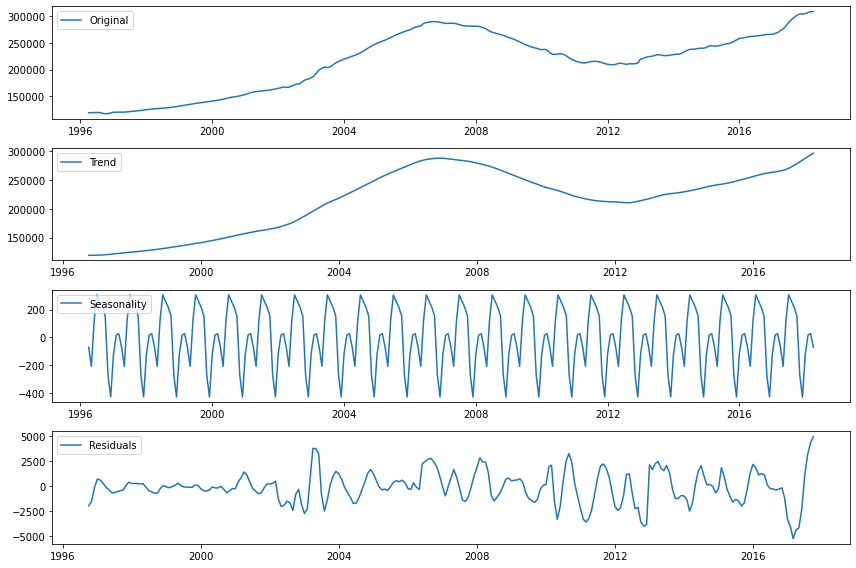

In [34]:
# Plot gathered statistics
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(melted_df['Washington'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()

In [41]:
# Drop NaN values from residuals.

house_ts_decompose = residual 
house_ts_decompose.dropna(inplace = True)

In [42]:
#Obtained this function from lecture 58 notebook. Used for better
#readabilty.

def display_df(dftest):
    '''
    Display the output from a Dickey-Fuller test in a more readable format
    '''
    
    
    dfoutput = pd.Series(
                dftest[0:4], 
                index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    display(dfoutput)

In [43]:
#After we take out the trend and the seasonality, we look at our residual
#with no null values.
dftest = adfuller(house_ts_decompose)


#Print out our results. 
display_df(dftest)

Test Statistic                -9.806590e+00
p-value                        5.804210e-17
#Lags Used                     1.000000e+00
Number of Observations Used    2.510000e+02
Critical Value (1%)           -3.456674e+00
Critical Value (5%)           -2.873125e+00
Critical Value (10%)          -2.572944e+00
dtype: float64

We got a stationary time series but we see that there are some trends in there still. We know that because our residuals is heteroskedastic.